# **Project Name**    - **Mobile Price Range Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**  Divya Kedia
##### **Team Member 2 -**  Sakshi Ghugare


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### **In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load Dataset

mobile_data= pd.read_csv('/content/drive/MyDrive/Mobile price prediction capstone/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
mobile_data.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
mobile_data.duplicated().sum()

0

 We have 0 duplicate values in dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
mobile_data.isna().sum().sort_values(ascending = False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

There are no null/missing values present in the dataset.

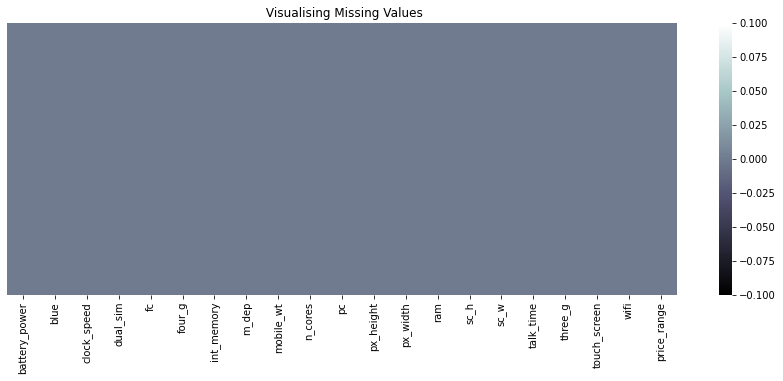

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(mobile_data.isnull(),cmap='bone',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

The dataset is about mobile companies who want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.
Tge objective is not to predict the actual price but a price range indicating how high the price is.

The dataset contains 2000 rows and 21 columns with no null/missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
mobile_data.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 



*   ### **Battery_power** - Total energy a battery can store in one time measured in mAh
* ### **Blue** - Has bluetooth or not(Yes=1,No=0)


* ### **Clock_speed** - speed at which microprocessor executes instructions
* ### **Dual_sim** - Has dual sim support or not(Yes=1,No=0)


* ### **Fc** - Front Camera mega pixels
* ### **Four_g** - Has 4G or not(Yes=1,No=0)


* ### **Int_memory** - Internal Memory in Gigabytes

* ### **M_dep** - Mobile Depth in cm


* ### **Mobile_wt** - Weight of mobile phone

* ### **N_cores** - Number of cores of processor


* ### **Pc** - Primary Camera mega pixels

* ### **Px_height** - Pixel Resolution Height


* ### **Px_width** - Pixel Resolution Width

* ### **Ram** - Random Access Memory in Mega Bytes


* ### **Sc_h** - Screen Height of mobile in cm
* ### **Sc_w** - Screen Width of mobile in cm


* ### **Talk_time** - longest time that a single battery charge will last

* ### **Three_g** - Has 3G or not(Yes=1,No=0)


* ### **Touch_screen** - Has touch screen or not(Yes=1,No=0)
* ### **Wifi** - Has wifi or not(Yes=1,No=0)


* ### **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

























### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#The nunique () method returns the number of unique values for each column
mobile_data.nunique()
     

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
mobile_data.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As we can see that screen width and pixel height has minimum value 0. Which is not possible.so we have to handle it.

In [ ]:
#how many values have 0 in screen width column
mobile_data[mobile_data['sc_w']==0].shape[0]

180

In [ ]:
#We are replacing 0 value with mean
mobile_data['sc_w']=mobile_data['sc_w'].replace(0,mobile_data['sc_w'].mean())

In [ ]:
#checking the shape of screen width
mobile_data[mobile_data['sc_w']==0].shape[0]
     

0

In [ ]:
#how many values have 0 in pixel width column

mobile_data[mobile_data['px_height']==0].shape[0]
     

2

In [ ]:
#Dropping the rows where pixel height is zero
mobile_data=mobile_data[mobile_data['px_height']!=0]

In [ ]:
#Checking for shape
mobile_data.shape

(1998, 21)

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in mobile_data.columns:
  if mobile_data[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(mobile_data.columns)-set(numerical_columns))

In [ ]:
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
print(categorical_columns)

['wifi', 'price_range', 'touch_screen', 'dual_sim', 'four_g', 'blue', 'three_g']


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Univariate Analysis of Numerical Variables

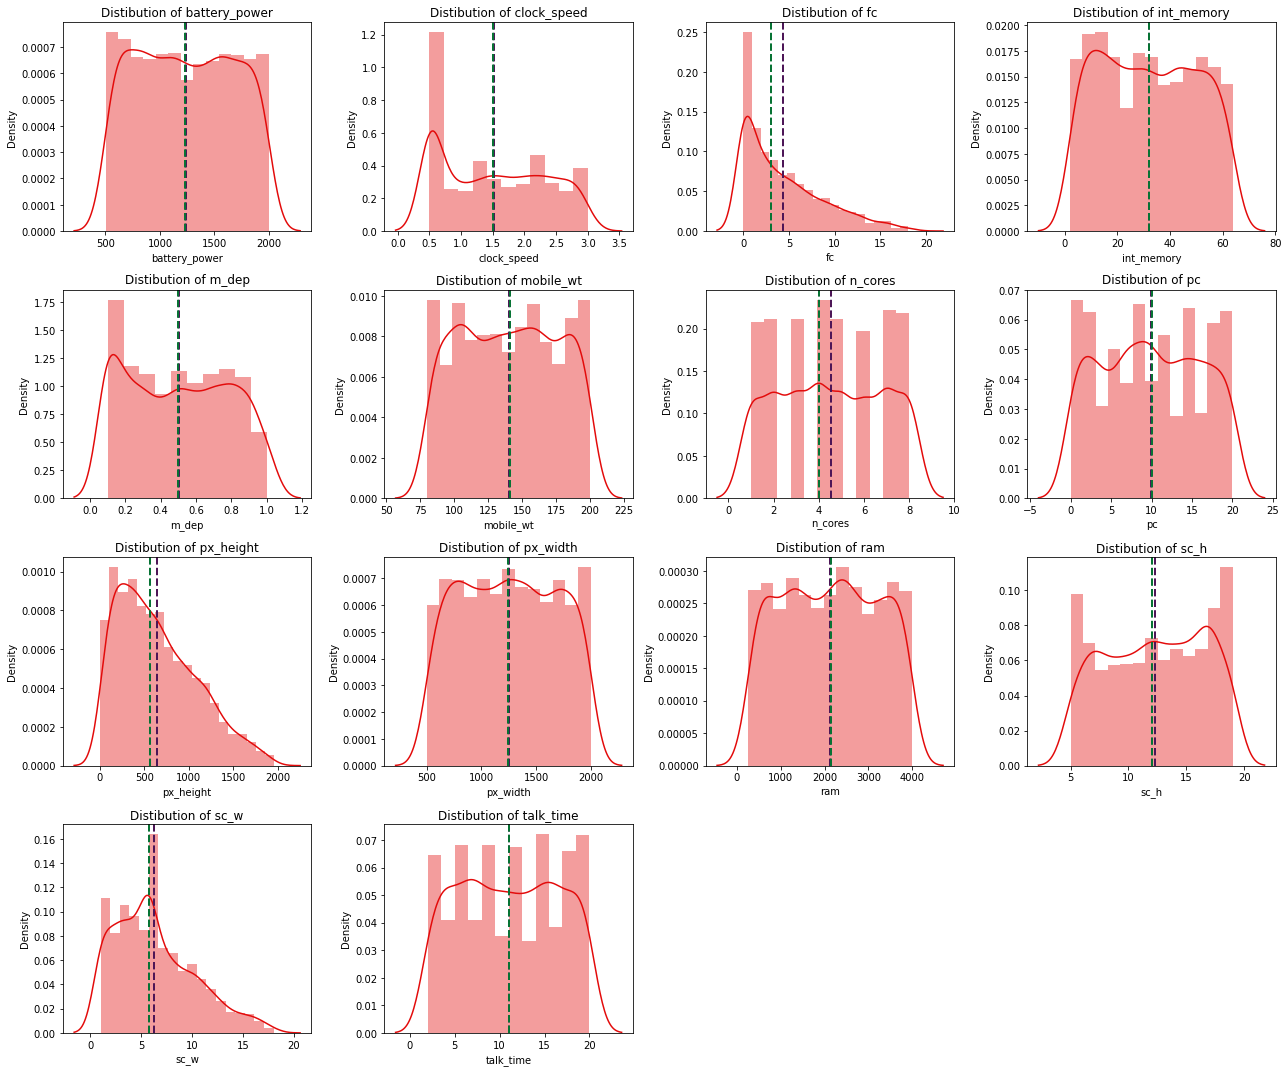

In [ ]:
# Chart - 1 visualization code
#Displaying the distribution plots of numerical columns
fig = plt.figure(figsize=(18,15))
c=1
for i in numerical_columns:
  plt.subplot(4,4, c)
  sns.distplot(mobile_data[i],kde=True, color = "#e30b0b")
  plt.title('Distibution of {}'.format(i))
  c+=1
  plt.axvline(mobile_data[i].mean(), color= "#4d1657", linestyle='dashed', linewidth=2)
  plt.axvline(mobile_data[i].median(), color='#077334', linestyle='dashed', linewidth=2)
  plt.tight_layout() 


##### 1. Why did you pick the specific chart?

### **A Distplot or distribution plot, depicts the variation in the data distribution.**
### **Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.**

#### Chart - 2

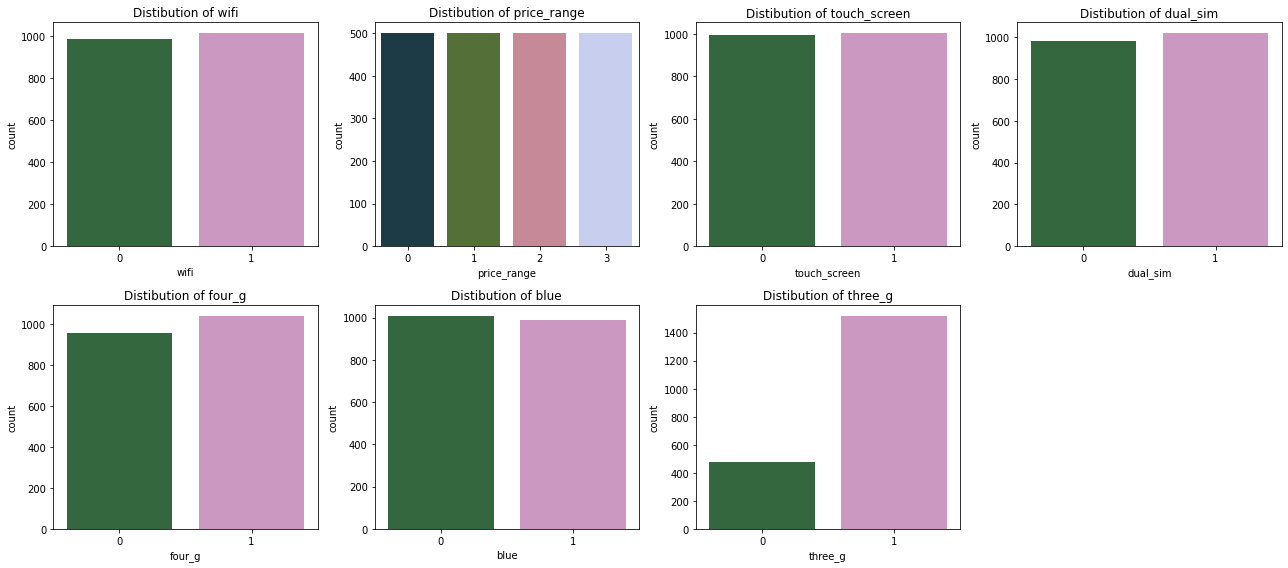

In [ ]:
# Chart - 2 visualization code
#Count plot of categorical columns

fig = plt.figure(figsize=(18,8))
c=1
for i in categorical_columns:
  plt.subplot(2,4, c)
  sns.countplot(mobile_data[i], palette="cubehelix")
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()  

##### 1. Why did you pick the specific chart?

**Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

##### 2. What is/are the insight(s) found from the chart?

**Most of the phones currently available in the market have 3G support.**

**There is a similar count of records for phones belonging to all price ranges in the given data.**

#### Chart - 3

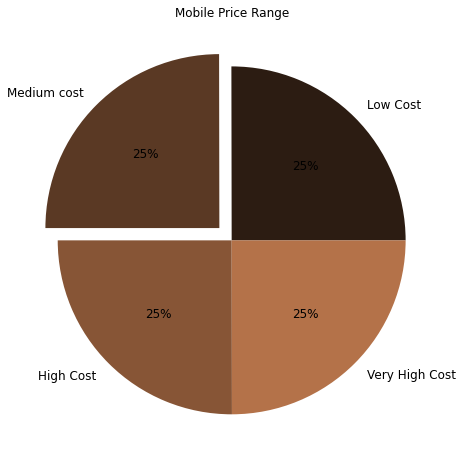

In [ ]:
# Chart - 3 visualization code
fig = plt.figure(1, figsize=(8,8))
data = [(len(mobile_data[mobile_data.price_range==0])),(len(mobile_data[mobile_data.price_range==1])),(len(mobile_data[mobile_data.price_range==2])),(len(mobile_data[mobile_data.price_range==3])) ]
keys = ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost']
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('copper')[0:4]
plt.pie(data, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Mobile Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

 **A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that the percentage of Low cost, medium cost, high cost and very high cost are same. That means that phones in all the ranges are available in the market equally.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, from this data we gained insight help which will create a positive business impact as phone of all rane must be available in the market as all are in the demand equally.**

#### Chart - 4

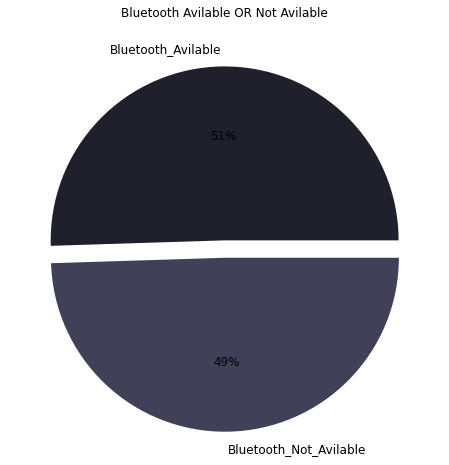

In [ ]:
# Chart - 4 visualization code
#checked if bluetooth available or not???

fig = plt.figure(1, figsize=(8,8))
blue_data = [(len(mobile_data[mobile_data.blue==0])),(len(mobile_data[mobile_data.blue==1]))]
blue_keys=["Bluetooth_Avilable","Bluetooth_Not_Avilable"]
explode = [0, 0.1]
palette_color =sns.color_palette('bone')
plt.pie(blue_data, labels=blue_keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable OR Not Avilable')
plt.show()

##### 1. Why did you pick the specific chart?

 **A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.**

##### 2. What is/are the insight(s) found from the chart?

**From this pie chart we can see that the percentage of the phones with bluetooth is 51% and those with not bluetooth have 49%. Which means that majority of people prefer phones with bluetooth.**

#### Chart - 5

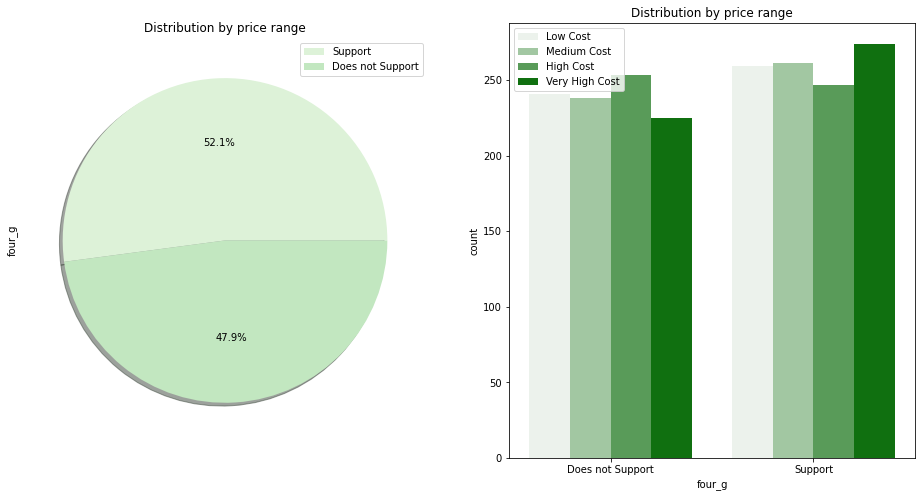

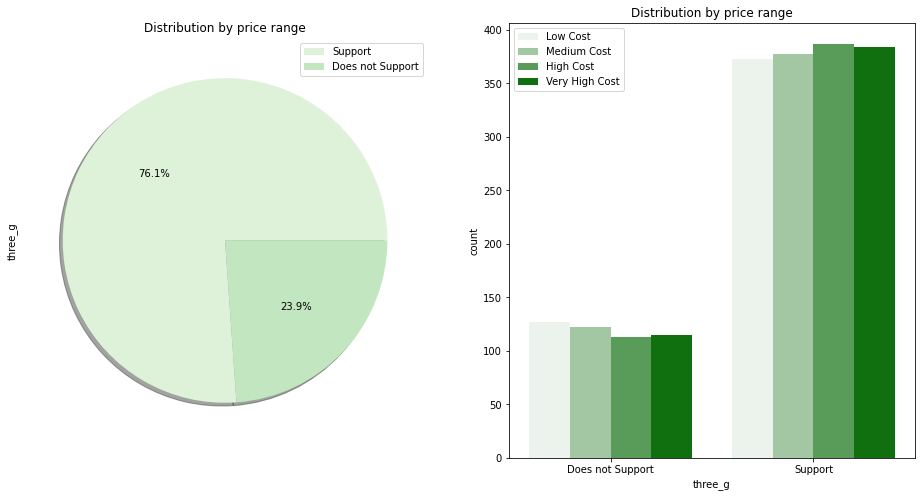

In [ ]:
# Chart - 5 visualization code
binary_features = [ 'four_g', 'three_g']
for dataset in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 8))

  palette_color =sns.color_palette('GnBu')
  mobile_data[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = mobile_data, ax = ax2, color = 'green')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

 **A pie chart represents the contribution of each part of the data to a whole and it makes very easy to understand the data.Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time. Which was exactly needed thus we selected pie chart.**

 **Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.The characteristics that make a good bar graph are as follows: Easy comparisons between different variables. Clarity in displaying trends in data. Easy determination in the value of a variable.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that the phone with(52.1%) and without(47.9%) 4G are almost same.**

**Phones which does not support 3G are very very low (23.9%). This means that people prefer phone which atleast support 3G.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes It will help creating a positive business impact.**

#### Chart - 6 Bivariate Analysis

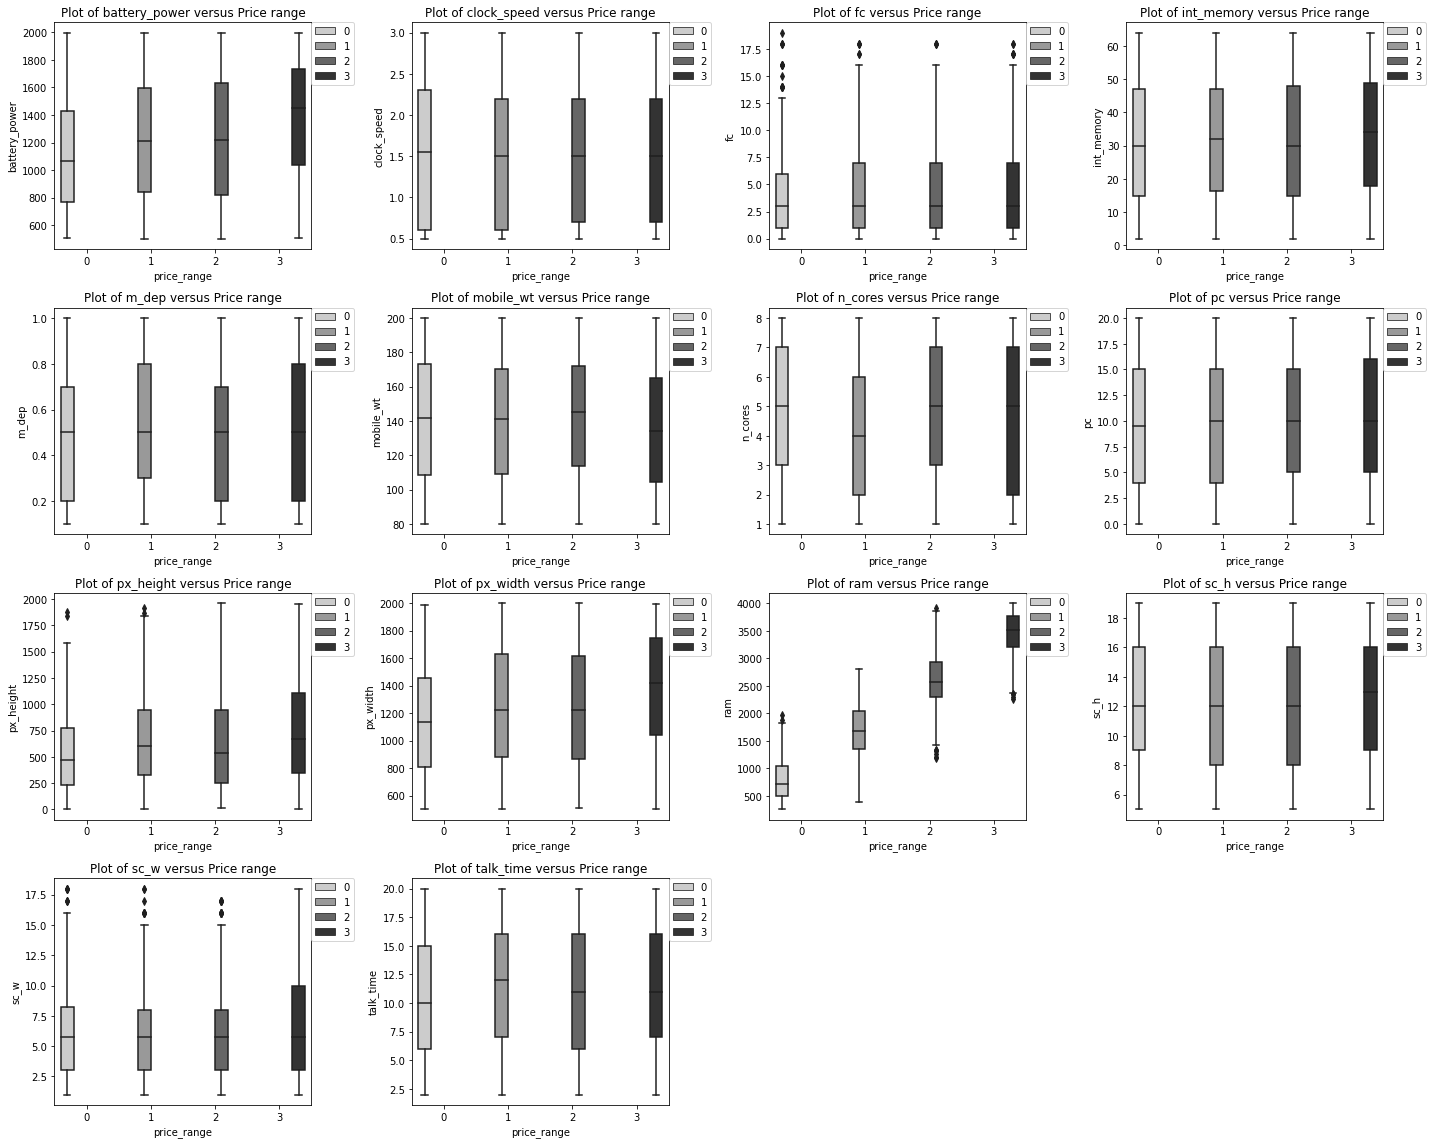

In [ ]:
# Chart - 6 visualization code
#Box plot of price range and independent numerical columns
fig = plt.figure(figsize=(20,16))
c=1
for i in numerical_columns :
    plt.subplot(4,4, c)
    sns.boxplot(x='price_range',y=i,data=mobile_data,hue='price_range',palette='binary')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

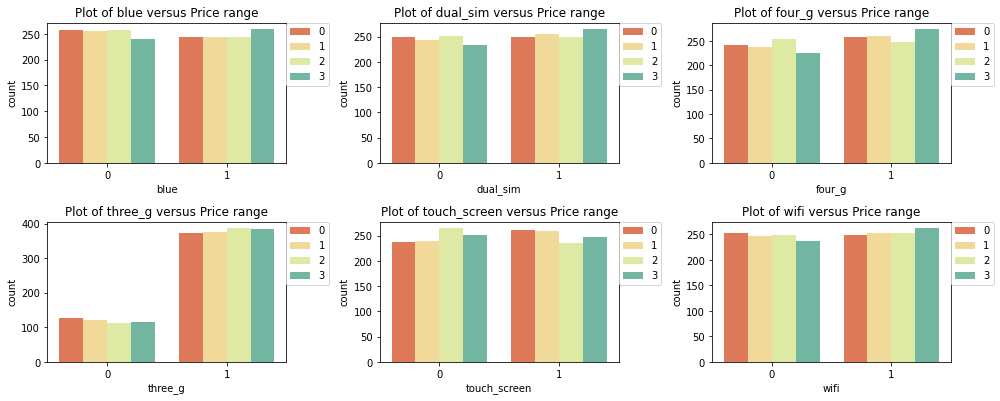

In [ ]:
# Chart - 7 visualization code
#count plot of price range vs categorical columns
fig = plt.figure(figsize=(14,8))
c=1
for i in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] :
    plt.subplot(3,3, c)
    sns.countplot(x=i,data=mobile_data,hue='price_range', palette='Spectral')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

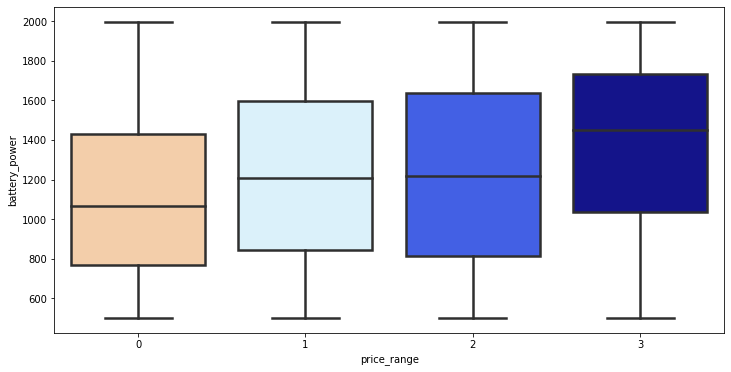

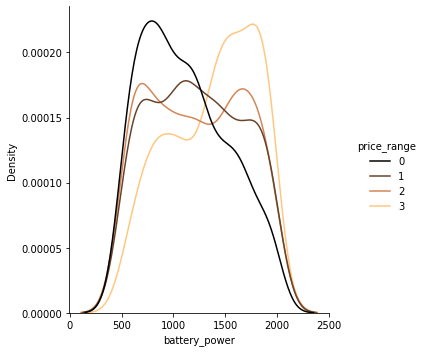

In [ ]:
# Chart - 8 visualization code
#plotting price range with battery
plt.figure(figsize=(12,6))
sns.boxplot(data=mobile_data,x="price_range",y="battery_power",palette="flag",linewidth=2.5)
sns.displot(data=mobile_data, x="battery_power", hue="price_range", kind="kde",palette="copper")
plt.show()


##### 1. Why did you pick the specific chart?

**Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.**

##### 2. What is/are the insight(s) found from the chart?

**Relatively expensive phones have higher battery capacity.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

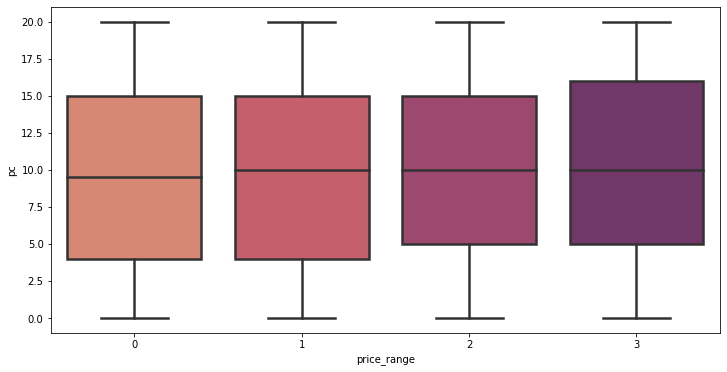

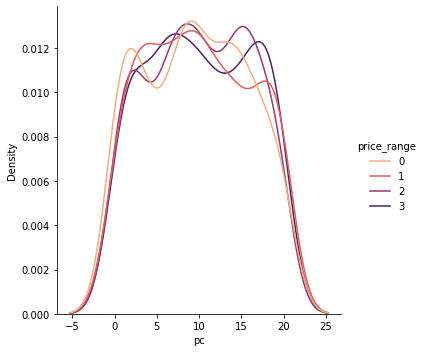

In [ ]:
# Chart - 9 visualization code
#plotting price range with primary camera pc
plt.figure(figsize=(12,6))
sns.boxplot(data=mobile_data,x="price_range",y="pc",palette="flare",linewidth=2.5)
sns.displot(data=mobile_data, x="pc", hue="price_range", kind="kde",palette="flare")
plt.show()

##### 1. Why did you pick the specific chart?

**Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.**

##### 2. What is/are the insight(s) found from the chart?

**Most expensive (category 3) phones have better cameras.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

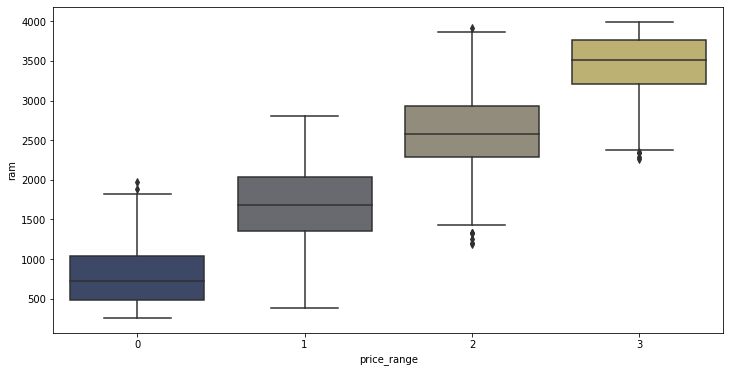

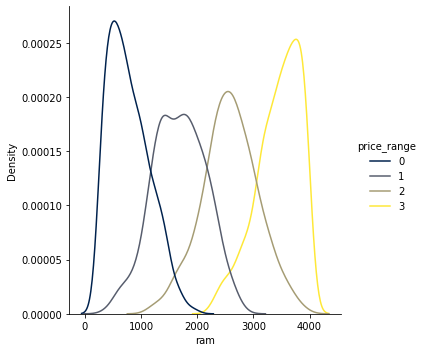

In [ ]:
# Chart - 10 visualization code
#plotting price range  with ram
plt.figure(figsize=(12,6))
sns.boxplot(data=mobile_data,x="price_range",y="ram",palette="cividis")
sns.displot(data=mobile_data, x="ram", hue="price_range", kind="kde",palette="cividis")
plt.show()
     

##### 1. Why did you pick the specific chart?

**Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.**

##### 2. What is/are the insight(s) found from the chart?

**Relatively expensive phones have more RAM.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

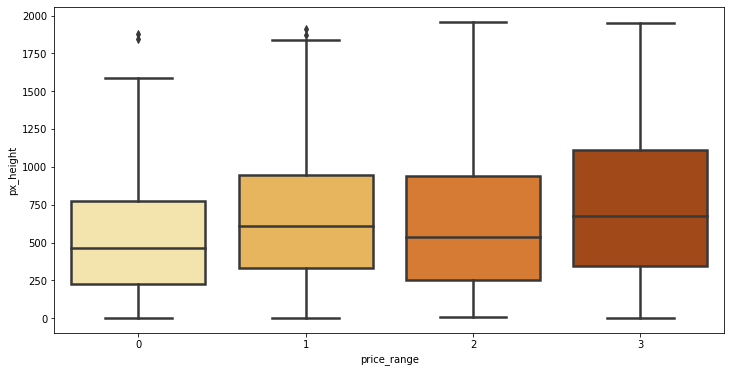

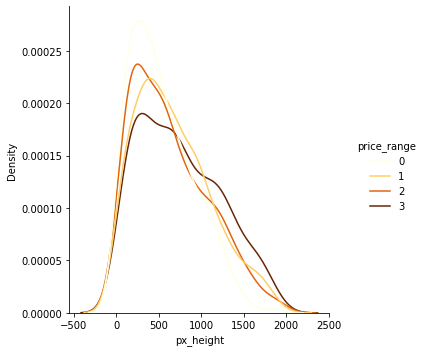

In [ ]:
# Chart - 11 visualization code
#plotting price range with pixel resolution height
plt.figure(figsize=(12,6))
sns.boxplot(data=mobile_data,x="price_range",y="px_height",palette="YlOrBr",linewidth=2.5)
sns.displot(data=mobile_data, x="px_height", hue="price_range", kind="kde",palette="YlOrBr")
plt.show()
     

##### 1. Why did you pick the specific chart?

**Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.**

##### 2. What is/are the insight(s) found from the chart?

**Expensive phones have better screen quality.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

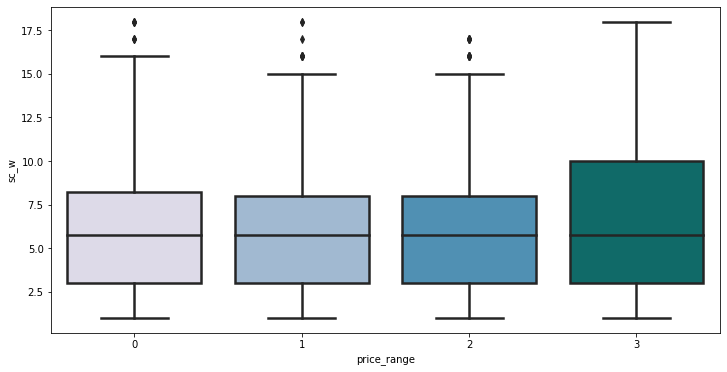

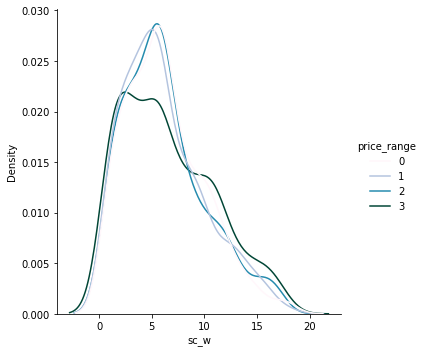

In [ ]:
# Chart - 12 visualization code
#plotting price range with screen width
plt.figure(figsize=(12,6))
sns.boxplot(data=mobile_data,x="price_range",y="sc_w",palette="PuBuGn",linewidth=2.5)
sns.displot(data=mobile_data, x="sc_w", hue="price_range", kind="kde",palette="PuBuGn")
plt.show()

##### 1. Why did you pick the specific chart?

**Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.**

##### 2. What is/are the insight(s) found from the chart?

**Most expensive phones have wider screens.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

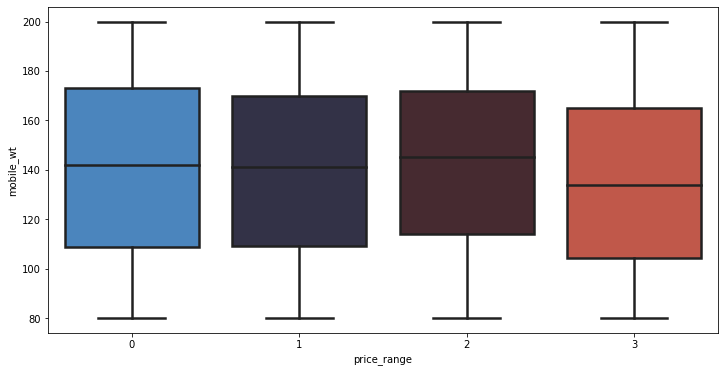

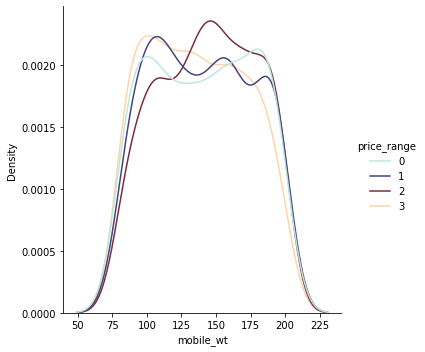

In [ ]:
# Chart - 13 visualization code
#plotting price range with mobile weight
plt.figure(figsize=(12,6))
sns.boxplot(data=mobile_data,x="price_range",y="mobile_wt",palette="icefire",linewidth=2.5)
sns.displot(data=mobile_data, x="mobile_wt", hue="price_range", kind="kde",palette="icefire")

plt.show()

##### 1. Why did you pick the specific chart?

**Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.**

##### 2. What is/are the insight(s) found from the chart?

**Most expensive phones are lighter than the competition others.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

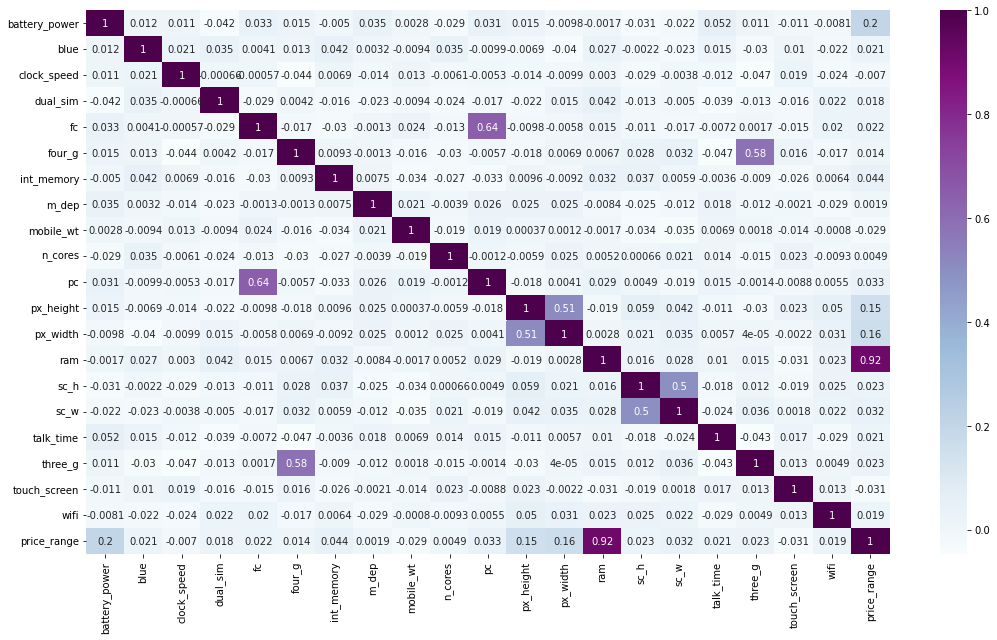

In [ ]:
# Correlation Heatmap visualization code
correlation = mobile_data.corr()
plt.figure(figsize = [18,10])
sns.heatmap(correlation, cmap = 'BuPu', annot = True)

##### 1. Why did you pick the specific chart?

**Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.**

##### 2. What is/are the insight(s) found from the chart?

**The most influential variable is RAM.**

**Most of the variables have very little correlation to price range.**

**Primary camera mega pixels and front Camera mega pixels have correlation but they do not effect price range.**

**Having 3G and 4G is somewhat correlated.**

**There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.**

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(mobile_data, hue="price_range")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# As seen above there are no missing values in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#Checking for outliers

fig = plt.figure(figsize=(15,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=mobile_data,palette = "bone")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
     

In [ ]:
columns = categorical_columns
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(mobile_data[i],palette = "cubehelix_r")
     

**There are no outliers to handle.**

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df = mobile_data.copy()

# create new colom screen size and pixels
mobile_data['screen_size']= round(np.sqrt(mobile_data['sc_h']**2+mobile_data['sc_w']**2)/2.54,2)

mobile_data['Pixels']=mobile_data['px_height']*mobile_data['px_width']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
 #dropping excess columns
mobile_data.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# creating the set of dependent and independent variables
X = mobile_data.drop(labels='price_range', axis=1)
Y = mobile_data['price_range']

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
**In this we have used MinMaxScaler method of scaling the data.**
**MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.**
**MinMaxScaler preserves the shape of the original distribution.It doesn’t meaningfully change the information embedded in the original data.**
**Note that MinMaxScaler doesn’t reduce the importance of outliers.**
**The default range for the feature returned by MinMaxScaler is 0 to 1.**

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)

##### What data splitting ratio have you used and why? 

**There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.**

**If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).**

**You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.**

**In this case the training dataset is small, that's why I have taken 80:20 ratio.**

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**We have a balanced dataset.**

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***